# Capstone II: Exploratory Data Analysis

We will build data profiles and plots, including relationship plot and correlation plot.

**The diffrent steps we will go over for the Exploratory Data Analyis**

* Build data profile tables and plots
        - Outliers & Anomalies
* Explore data relationships
* Identification and creation of features

Load the needed packages and modules into Python

In [3]:
import os 
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import requests
import pandas_profiling
from pandas_profiling.utils.cache import cache_file

Let us print the current working directory and change it if necessary

In [4]:
os.getcwd()

'C:\\Users\\meteu\\Desktop\\All my desktop data\\SPRINGBOARD'

In [5]:
path="C:/Users/meteu/Desktop/SPRINGBOARD/PROJECT 2/data"
print(os.chdir(path))

None


In [6]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 603D-12C6

 Directory of C:\Users\meteu\Desktop\SPRINGBOARD\PROJECT 2\data

06/30/2020  09:05 PM    <DIR>          .
06/30/2020  09:05 PM    <DIR>          ..
06/30/2020  07:50 PM           125,900 chart.PNG
06/27/2020  11:24 AM         3,420,416 clean_data.csv
               2 File(s)      3,546,316 bytes
               2 Dir(s)  388,315,987,968 bytes free


Let us load the data.

In [88]:
df=pd.read_csv('clean_data.csv')

In [89]:
df.head()

Unnamed: 0  id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  \
0           0   0  18393       2     168    62.0    110     80            1   
1           1   1  20228       1     156    85.0    140     90            3   
2           2   2  18857       1     165    64.0    130     70            3   
3           3   3  17623       2     169    82.0    150    100            1   
4           4   4  17474       1     156    56.0    100     60            1   

   gluc  smoke  alco  active  cardio  
0     1      0     0       1       0  
1     1      0     0       1       1  
2     1      0     0       0       1  
3     1      0     0       1       1  
4     1      0     0       0       0

In [90]:
#We are deleting the column named "Unnamed: 0"
df=df.drop(columns=['Unnamed: 0'])
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

## Build data profile tables and plots

Let us print the summary statistics

In [91]:
df.describe().T

count          mean           std      min       25%      50%  \
id           70000.0  49972.419900  28851.302323      0.0  25006.75  50001.5   
age          70000.0  19468.865814   2467.251667  10798.0  17664.00  19703.0   
gender       70000.0      1.349571      0.476838      1.0      1.00      1.0   
height       70000.0    164.359229      8.210126     55.0    159.00    165.0   
weight       70000.0     74.205690     14.395757     10.0     65.00     72.0   
ap_hi        70000.0    128.817286    154.011419   -150.0    120.00    120.0   
ap_lo        70000.0     96.630414    188.472530    -70.0     80.00     80.0   
cholesterol  70000.0      1.366871      0.680250      1.0      1.00      1.0   
gluc         70000.0      1.226457      0.572270      1.0      1.00      1.0   
smoke        70000.0      0.088129      0.283484      0.0      0.00      0.0   
alco         70000.0      0.053771      0.225568      0.0      0.00      0.0   
active       70000.0      0.803729      0.397179      0.0      1.00      1.0   
cardio       70000.0      0.499700      0.500003      0.0      0.00      0.0   

                  75%      max  
id           74889.25  99999.0  
age          21327.00  23713.0  
gender           2.00      2.0  
height         170.00    250.0  
weight          82.00    200.0  
ap_hi          140.00  16020.0  
ap_lo           90.00  11000.0  
cholesterol      2.00      3.0  
gluc             1.00      3.0  
smoke            0.00      1.0  
alco             0.00      1.0  
active           1.00      1.0  
cardio           1.00      1.0

* Based on the summary statistics we can find a lot of errors in the data:
  - We see that the Systolic blood pressure and Diastolic blood pressure have negative values.
  - The max of the Systolic blood pressure is 16020 which is not quite realistic.
  - The max of Diastolic blood pressure is 11000.
  - We can also see that the minimum weight is 10kg which does not make sense when we have the minimum age equal to 10798 days (29 years)
  - The same goes for the minimum height (equal to 55cm)


Let us delete the Systolic blood pressure and Diastolic blood pressure negative values in our data.


In [92]:
df1=df[~df['ap_hi']<0]
print("The number of observation removed that have the negative values in Systolic blood pressure are {0}.".format(df[df['ap_hi']<0].shape[0]))

The number of observation removed that have the negative values in Systolic blood pressure are 7.


In [93]:
df2=df1[~df1['ap_lo']<0]
print("The number of observation removed that have the negative values in Diastilic blood pressure are {0}.".format(df1[df1['ap_lo']<0].shape[0]))

The number of observation removed that have the negative values in Diastilic blood pressure are 1.


According Viva Health if we use that we have between high and low blood pressure, Let us give an interval of values where the systolic blood pressure and the Diastolic blood pressure will belong. According to Vivo Health we can set the Systolic blood pressure between 70 and 190 and the Diastolic blood pressure between 40 and 100.

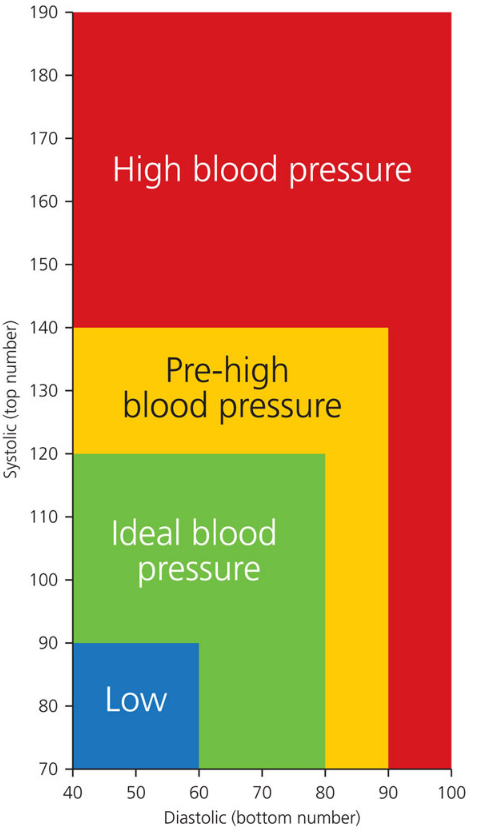

In [94]:

from IPython.display import Image
Image(filename='chart.png') 

In [95]:
df3=df2[~(df2['ap_hi']<70)]
print ("The number of observation removed that have Systolic pressure less than 70 is {0}.".format(df2[df2['ap_hi']<70].shape[0]))

The number of observation removed that have Systolic pressure less than 70 is 181.


In [96]:
df4=df3[~(df3['ap_hi']>190)]
print ("The number of observation removed that have Systolic pressure more than 190 is {0}.".format(df3[df3['ap_hi']>190].shape[0]))

The number of observation removed that have Systolic pressure more than 190 is 220.


In [97]:
df5=df4[~(df4['ap_lo']<40)]
print ("The number of observation removed that have Diastolic pressure less than 40 is {0}.".format(df4[df4['ap_lo']<40].shape[0]))

The number of observation removed that have Diastolic pressure less than 40 is 47.


In [98]:
df6=df5[~(df5['ap_lo']>100)]
print ("The number of observation removed that have Diastolic pressure more than 100 is {0}.".format(df5[df5['ap_lo']>100].shape[0]))

The number of observation removed that have Diastolic pressure more than 100 is 1607.


The Systolic blood pressure will always be superior to the Diastolic blood pressure. Let us check to see if that is the case in our dataset.

In [99]:
df7=df6[df6['ap_hi']>df6['ap_lo']]
print("The number of observation removed where the Diastolic blood pressure is superior or equal to the Systolic blood pressure is {0}.".format(df6[df6['ap_hi']<=df6['ap_lo']].shape[0]))

The number of observation removed where the Diastolic blood pressure is superior or equal to the Systolic blood pressure is 8.


We will now sort the height and the weight column to have a closed vue of what is in our data and what to remove

In [100]:
df7['weight'].sort_values()

33817     11.0
60188     21.0
29488     22.0
26806     23.0
34276     28.0
         ...  
61362    180.0
4743     180.0
61285    183.0
50413    200.0
435      200.0
Name: weight, Length: 67929, dtype: float64

In [101]:
df7['height'].sort_values()

22723     55
66643     57
64115     59
29157     60
27603     64
        ... 
66145    198
63154    198
12007    198
21628    207
6486     250
Name: height, Length: 67929, dtype: int64

Let us take an example of a weight of 200 kg and let see the corresponding heights.

In [102]:
p=df7[df7['weight']==200.0]['height'].sort_values()
p

50413    180
435      186
Name: height, dtype: int64

Let us create another column called BMI (body mass index). Let us assume that the BMI varies between 19kg/m^2 and 45kg/m^2 based on the chart below. We will delete all the observations whose BMI does not belong to this intervall.

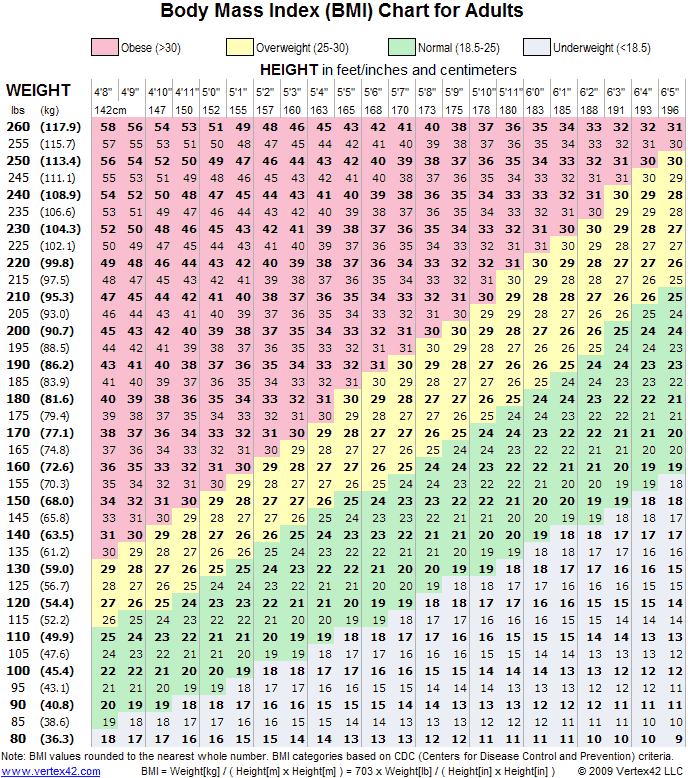

In [103]:
Image(filename='BMI.png') 

In [104]:
df7['BMI']=(df7['weight']/(df7['height']**2))*10**4
df7.head()

C:\Users\meteu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio        BMI  
0     0       1       0  21.967120  
1     0       1       1  34.927679  
2     0       0       1  23.507805  
3     0       1       1  28.710479  
4     0       0       0  23.011177

In [105]:
df8=df7[~(df7['BMI']<19)]

print("The number of observation removed where the BMI is less than 19kg/m^2 is {0}.".format(df7[df7['BMI']<19].shape[0]))

The number of observation removed where the BMI is less than 19kg/m^2 is 912.


In [106]:
df9=df8[~(df8['BMI']>45)]
print("The number of observation removed where the BMI is more than 45kg/m^2 is {0}.".format(df8[df8['BMI']>45].shape[0]))

The number of observation removed where the BMI is more than 45kg/m^2 is 539.


In [107]:
df9.describe().T

count          mean           std           min           25%  \
id           66478.0  49962.932669  28840.421546      0.000000  24973.250000   
age          66478.0  19470.498390   2465.429811  10798.000000  17668.000000   
gender       66478.0      1.349349      0.476768      1.000000      1.000000   
height       66478.0    164.456407      7.787961    120.000000    159.000000   
weight       66478.0     73.980101     13.259723     30.000000     65.000000   
ap_hi        66478.0    126.238485     15.798667     70.000000    120.000000   
ap_lo        66478.0     81.013192      8.804403     40.000000     80.000000   
cholesterol  66478.0      1.360992      0.676473      1.000000      1.000000   
gluc         66478.0      1.223698      0.570079      1.000000      1.000000   
smoke        66478.0      0.087307      0.282287      0.000000      0.000000   
alco         66478.0      0.052860      0.223755      0.000000      0.000000   
active       66478.0      0.802867      0.397837      0.000000      1.000000   
cardio       66478.0      0.492644      0.499950      0.000000      0.000000   
BMI          66478.0     27.378192      4.743558     19.003908     23.875115   

                      50%           75%           max  
id           50008.500000  74842.750000  99999.000000  
age          19705.000000  21328.000000  23713.000000  
gender           1.000000      2.000000      2.000000  
height         165.000000    170.000000    198.000000  
weight          72.000000     82.000000    149.000000  
ap_hi          120.000000    140.000000    190.000000  
ap_lo           80.000000     90.000000    100.000000  
cholesterol      1.000000      1.000000      3.000000  
gluc             1.000000      1.000000      3.000000  
smoke            0.000000      0.000000      1.000000  
alco             0.000000      0.000000      1.000000  
active           1.000000      1.000000      1.000000  
cardio           0.000000      1.000000      1.000000  
BMI             26.346494     30.102119     44.997166

Let us check to see how many observations we have removed so far

In [108]:
print("The total number of observations removed from our data set is {0}." .format(df.shape[0]-df9.shape[0]))

The total number of observations removed from our data set is 3522.


Let us use histograms to review the range and density of values for features in the data

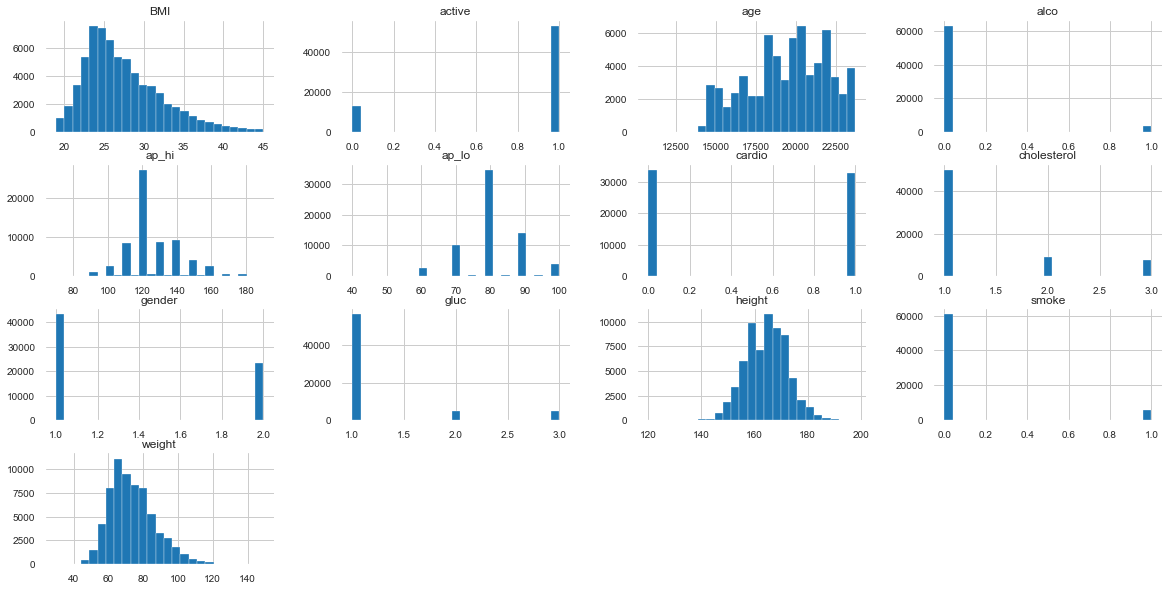

In [109]:
#we will drop the column 'id'
df=df9
df=df.drop(columns=['id'])
hist=df.hist(bins=25, figsize=(20,10))

There is no really any indication based on these histograms that there are diplicated feature or highy correlated features.

## Anomalies & Outliers- Review boxplots

Let us print the boxplot for every feature. We are creating boxplots to see the potential outliers or data anomalies. They are observations that differ significantly form the other values in the dataset.

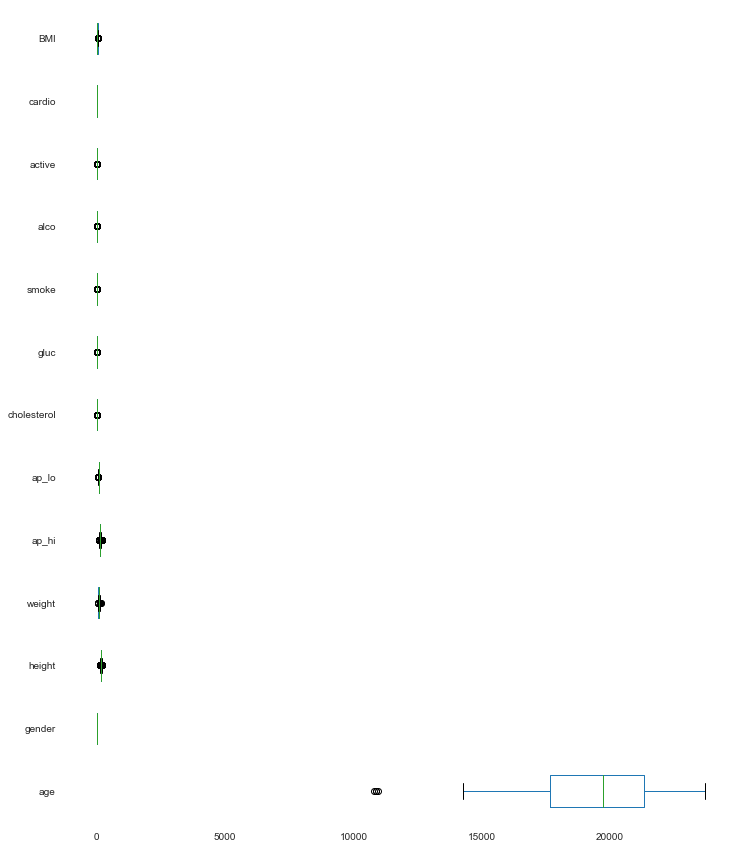

In [110]:
boxplot=df.boxplot(grid=False, vert=False, fontsize=10, figsize=(12,15))

The column 'age' has outliers but there is nothing that is making us delete the outliers. So we will keep those.

# Explore data relationships

Create pairplots or what is commonly referred to as biplots


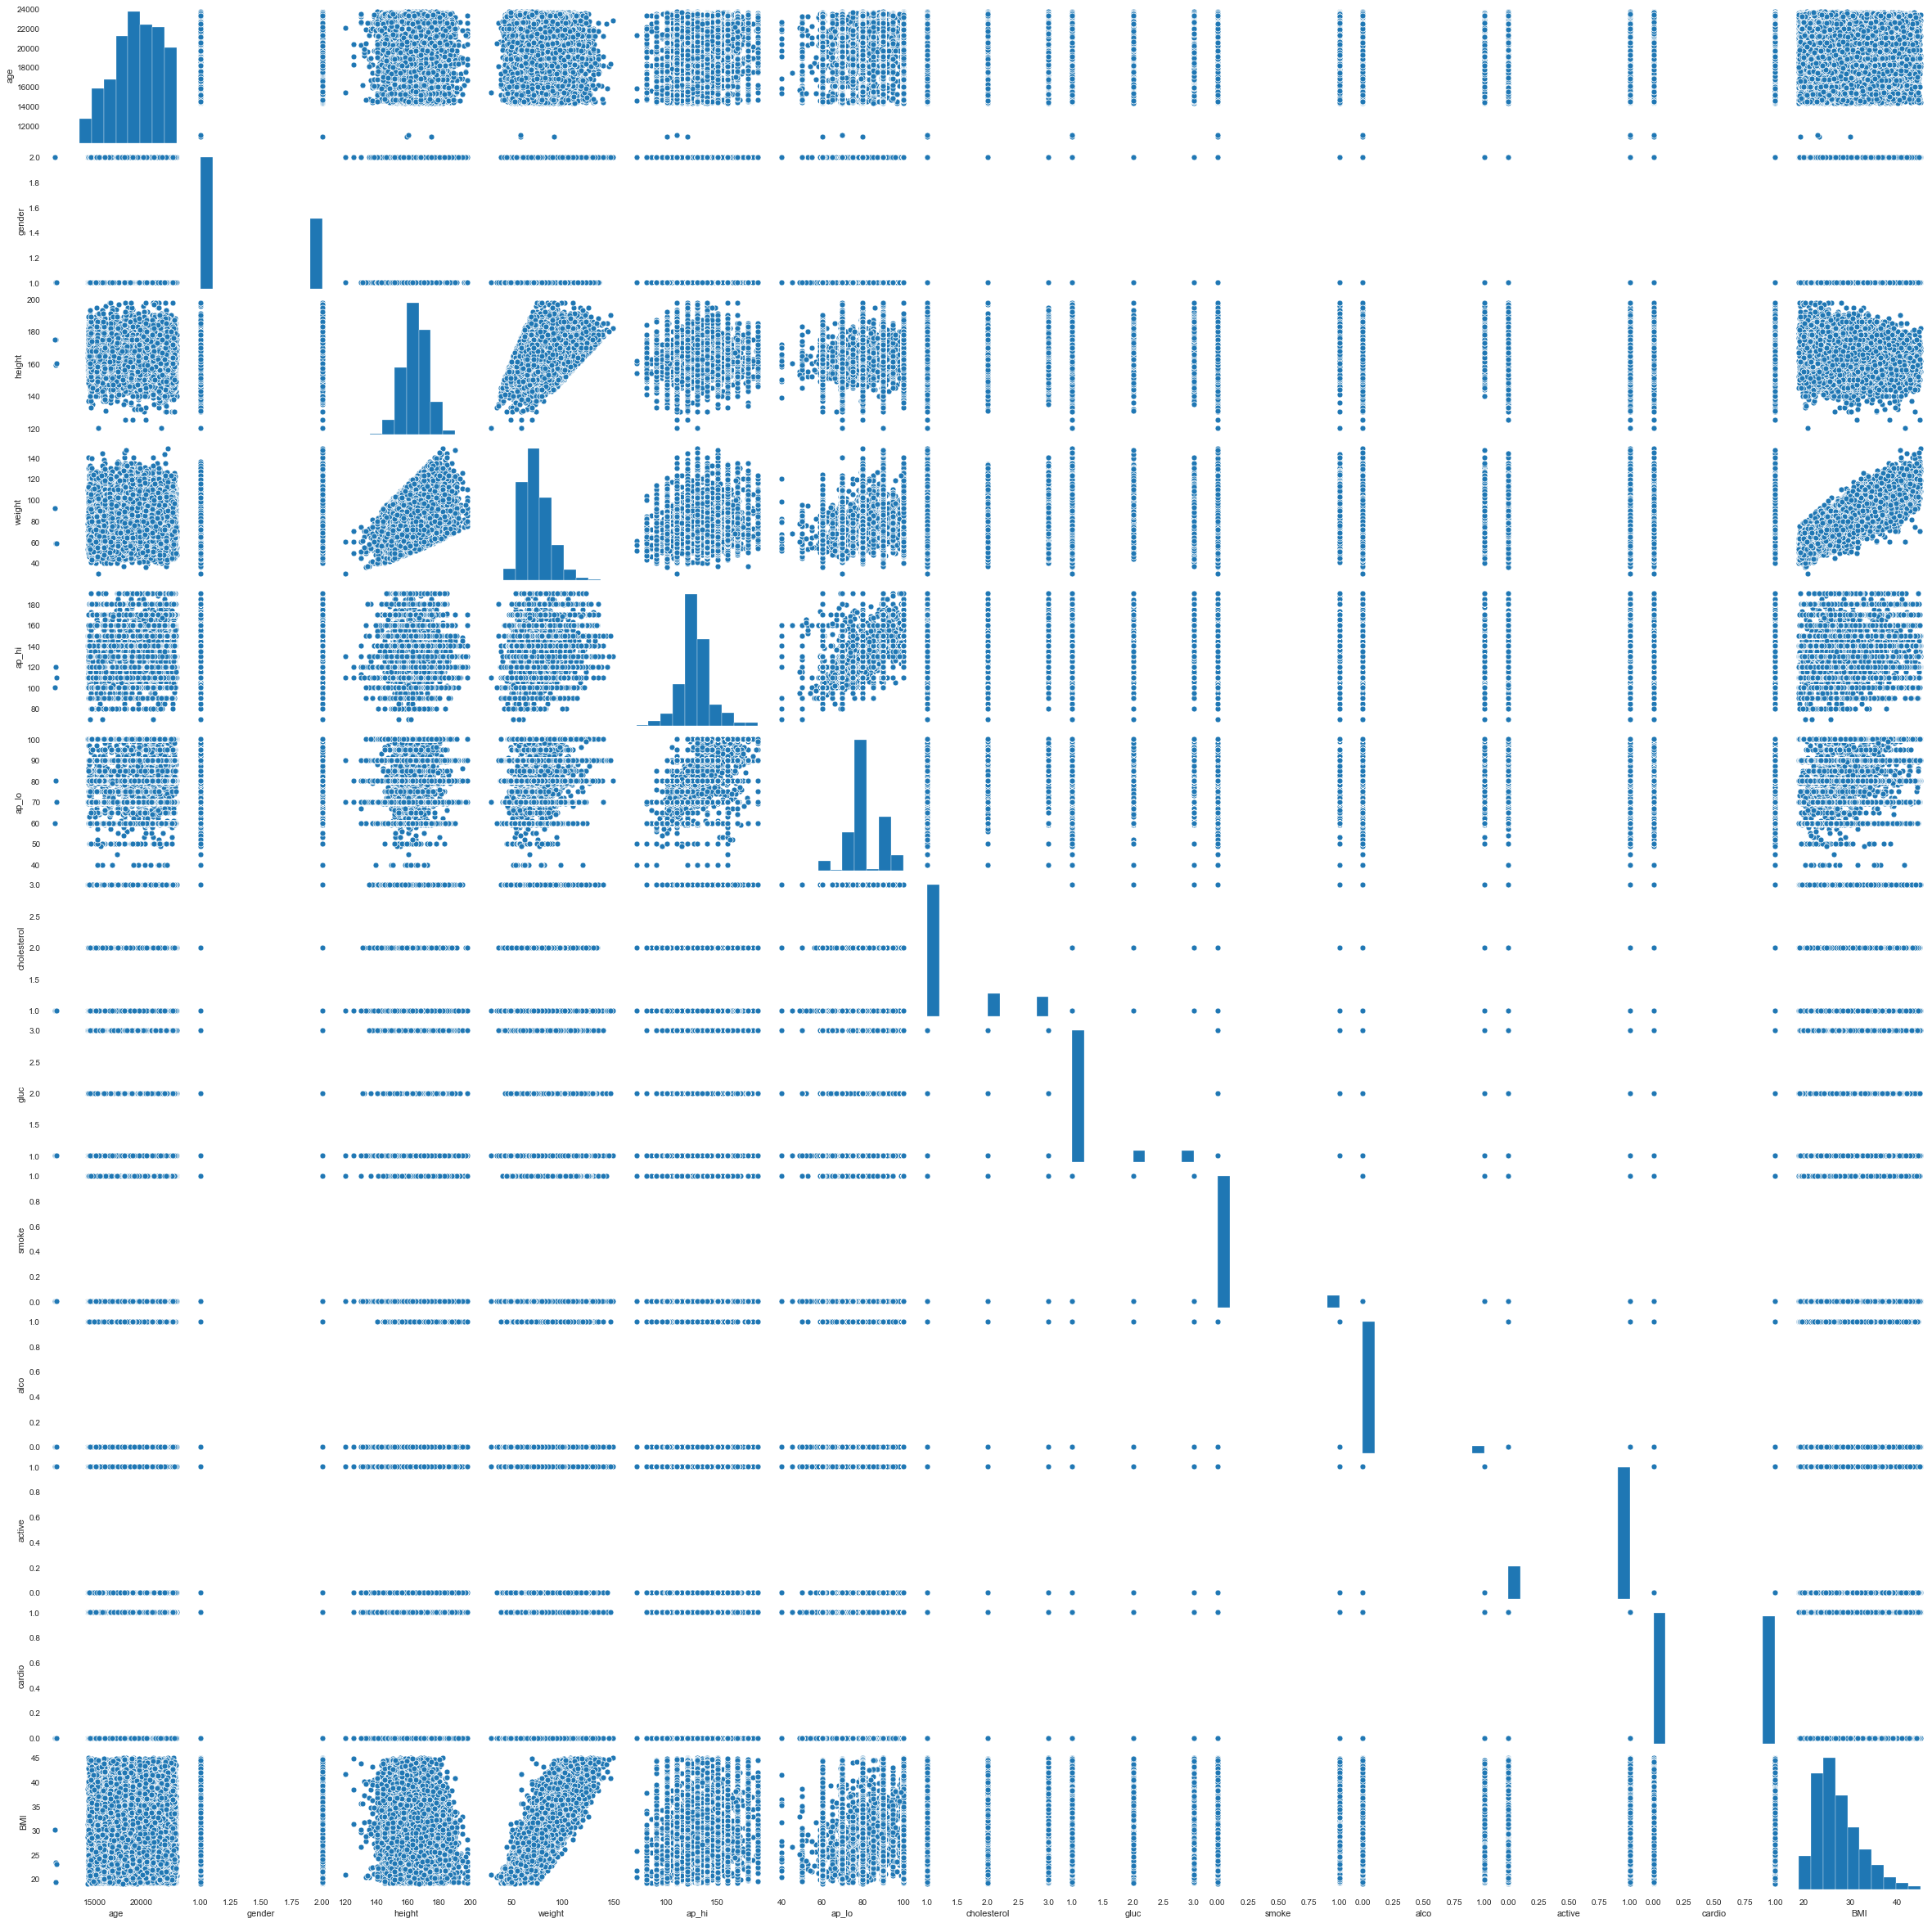

In [115]:
pplots=sns.pairplot(df)
pplots

## Identification and creation of features (feature engineering)

Let us create a Pearson correlation heatmap

In [116]:
#Calculate the correlation coefficients
corr =df.corr(method='pearson')
#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')

Let us create a correlation matrix that excludes my response variable 'cardio'

In [118]:
corr_matrix=df.drop(['cardio'], axis=1).corr().abs()
corr_matrix

age    gender    height    weight     ap_hi     ap_lo  \
age          1.000000  0.023668  0.085421  0.052235  0.213357  0.160218   
gender       0.023668  1.000000  0.520160  0.178179  0.062518  0.067665   
height       0.085421  0.520160  1.000000  0.349710  0.021800  0.041194   
weight       0.052235  0.178179  0.349710  1.000000  0.254191  0.237273   
ap_hi        0.213357  0.062518  0.021800  0.254191  1.000000  0.713071   
ap_lo        0.160218  0.067665  0.041194  0.237273  0.713071  1.000000   
cholesterol  0.154681  0.036132  0.054262  0.135218  0.191179  0.155191   
gluc         0.099014  0.020155  0.019286  0.098139  0.089003  0.068991   
smoke        0.047676  0.338599  0.195538  0.077369  0.025985  0.023480   
alco         0.028096  0.169126  0.097824  0.071669  0.032004  0.033526   
active       0.009918  0.005172  0.009530  0.015827  0.000882  0.000185   
BMI          0.104347  0.109046  0.193652  0.847071  0.253787  0.225481   

             cholesterol      gluc     smoke      alco    active       BMI  
age             0.154681  0.099014  0.047676  0.028096  0.009918  0.104347  
gender          0.036132  0.020155  0.338599  0.169126  0.005172  0.109046  
height          0.054262  0.019286  0.195538  0.097824  0.009530  0.193652  
weight          0.135218  0.098139  0.077369  0.071669  0.015827  0.847071  
ap_hi           0.191179  0.089003  0.025985  0.032004  0.000882  0.253787  
ap_lo           0.155191  0.068991  0.023480  0.033526  0.000185  0.225481  
cholesterol     1.000000  0.449388  0.008414  0.033837  0.008429  0.170774  
gluc            0.449388  1.000000  0.006108  0.009661  0.007192  0.112519  
smoke           0.008414  0.006108  1.000000  0.340853  0.024400  0.030044  
alco            0.033837  0.009661  0.340853  1.000000  0.024964  0.018914  
active          0.008429  0.007192  0.024400  0.024964  1.000000  0.011749  
BMI             0.170774  0.112519  0.030044  0.018914  0.011749  1.000000

Since the correlation matrix actually contains the same information twice, let us selct the upper triangle of it.

In [120]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

age    gender    height    weight     ap_hi     ap_lo  \
age          NaN  0.023668  0.085421  0.052235  0.213357  0.160218   
gender       NaN       NaN  0.520160  0.178179  0.062518  0.067665   
height       NaN       NaN       NaN  0.349710  0.021800  0.041194   
weight       NaN       NaN       NaN       NaN  0.254191  0.237273   
ap_hi        NaN       NaN       NaN       NaN       NaN  0.713071   
ap_lo        NaN       NaN       NaN       NaN       NaN       NaN   
cholesterol  NaN       NaN       NaN       NaN       NaN       NaN   
gluc         NaN       NaN       NaN       NaN       NaN       NaN   
smoke        NaN       NaN       NaN       NaN       NaN       NaN   
alco         NaN       NaN       NaN       NaN       NaN       NaN   
active       NaN       NaN       NaN       NaN       NaN       NaN   
BMI          NaN       NaN       NaN       NaN       NaN       NaN   

             cholesterol      gluc     smoke      alco    active       BMI  
age             0.154681  0.099014  0.047676  0.028096  0.009918  0.104347  
gender          0.036132  0.020155  0.338599  0.169126  0.005172  0.109046  
height          0.054262  0.019286  0.195538  0.097824  0.009530  0.193652  
weight          0.135218  0.098139  0.077369  0.071669  0.015827  0.847071  
ap_hi           0.191179  0.089003  0.025985  0.032004  0.000882  0.253787  
ap_lo           0.155191  0.068991  0.023480  0.033526  0.000185  0.225481  
cholesterol          NaN  0.449388  0.008414  0.033837  0.008429  0.170774  
gluc                 NaN       NaN  0.006108  0.009661  0.007192  0.112519  
smoke                NaN       NaN       NaN  0.340853  0.024400  0.030044  
alco                 NaN       NaN       NaN       NaN  0.024964  0.018914  
active               NaN       NaN       NaN       NaN       NaN  0.011749  
BMI                  NaN       NaN       NaN       NaN       NaN       NaN

Let us find the index of feature columns with a correlation greater than 0.90. We are creating a variable called to_drop that will containt such columns.

In [122]:
to_drop=[column for column in upper.columns if any(upper[column]>0.90)]
to_drop

[]

We can see that there is not such column in our dataset.

# Futher exploratory data analysis

The pandas df.describe() function is great but a little basic for serious exploratory data analysis. We will use Pandas Profilling. Pandas Profiling Generates profile reports from a pandas DataFrame.Pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

In [123]:
import requests
import pandas_profiling
from pandas_profiling.utils.cache import cache_file

In [124]:
profile_report = df.profile_report(explorative=True, html={'style': {'full_width': True}})
profile_report

We can even put this report in a widgets form to save space

In [125]:
profile_report.to_widgets()

In [126]:
df.to_csv(r'C:/Users/meteu/Desktop/SPRINGBOARD/PROJECT 2/data/ready_data.csv')